# Logistic Regression

We will be using the Heart Disease Dataset, with 768 rows and 9 attributes 

Objective - To build a classifier to predict if a patient is diabetic or not using logistic regression

In [3]:
#loading the dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\diabetes-1.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
#data exploration
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

There are 500 people who are not diabetic and 268 people who are diabetic

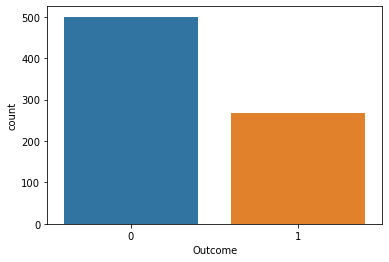

In [6]:
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df["Outcome"])

In [9]:
#splitting the dataset into features(x) and targets(y) label sets

x = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [10]:
print(x.head())

print(x.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
(768, 8)


In [11]:
print(y.head())

print(y.shape)

   Outcome
0        1
1        0
2        1
3        0
4        1
(768, 1)


In [12]:
#import module from split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)


In [13]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [14]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(xtrain,ytrain)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#predicting the test result
y_pred = logmodel.predict(xtest)

In [16]:
#calculating the accuracy
print("Accuracy:" , (logmodel.score(xtest,ytest)))

Accuracy: 0.7792207792207793


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       113
           1       0.56      0.76      0.65        41

    accuracy                           0.78       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.81      0.78      0.79       154



In [12]:
#evaluating the model with confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(ytest,y_pred)
print(confusion_matrix)

[[89 10]
 [24 31]]


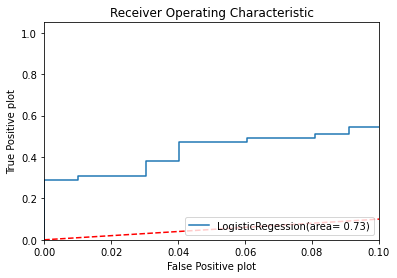

In [16]:
#building the roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest,y_pred)
fpr,tpr,thresholds = roc_curve(ytest,logmodel.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'LogisticRegession(area= %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,0.1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive plot')
plt.ylabel('True Positive plot')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_Roc')
plt.show()